# Análise Exploratória - Dados de Sensores Industriais

Este notebook realiza a análise exploratória dos dados de sensores industriais para o Challenge Hermes Reply.

## Dataset: Factory Sensor Simulator 2040
- **Registros:** 500,000 leituras de sensores
- **Período:** Dados simulados para 2040
- **Objetivo:** Predição de falhas em máquinas industriais

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configurações
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

# Caminhos
DATA_PATH = Path('../data/raw')
REPORTS_PATH = Path('../reports/figures')
REPORTS_PATH.mkdir(parents=True, exist_ok=True)

## 1. Carregamento e Visão Geral dos Dados

In [ ]:
# Carregar dataset
df = pd.read_csv(DATA_PATH / 'factory_sensor_simulator_2040.csv')

print(f"Shape do dataset: {df.shape}")
print("\nTipos de dados:")
print(df.dtypes)

print("\nPrimeiras 5 linhas:")
df.head()

Shape do dataset: (500000, 22)

Tipos de dados:
Machine_ID                     object
Machine_Type                   object
Installation_Year               int64
Operational_Hours               int64
Temperature_C                 float64
Vibration_mms                 float64
Sound_dB                      float64
Oil_Level_pct                 float64
Coolant_Level_pct             float64
Power_Consumption_kW          float64
Last_Maintenance_Days_Ago       int64
Maintenance_History_Count       int64
Failure_History_Count           int64
AI_Supervision                   bool
Error_Codes_Last_30_Days        int64
Remaining_Useful_Life_days    float64
Failure_Within_7_Days            bool
Laser_Intensity               float64
Hydraulic_Pressure_bar        float64
Coolant_Flow_L_min            float64
Heat_Index                    float64
AI_Override_Events              int64
dtype: object

Primeiras 5 linhas:


,Machine_ID,Machine_Type,Installation_Year,Operational_Hours,Temperature_C,Vibration_mms,Sound_dB,Oil_Level_pct,Coolant_Level_pct,Power_Consumption_kW,...,Failure_History_Count,AI_Supervision,Error_Codes_Last_30_Days,Remaining_Useful_Life_days,Failure_Within_7_Days,Laser_Intensity,Hydraulic_Pressure_bar,Coolant_Flow_L_min,Heat_Index,AI_Override_Events
0,MC_000000,Mixer,2027,81769,73.43,12.78,83.72,36.76,68.74,84.95,...,5,True,3,162.0,False,NaN,NaN,NaN,NaN,2
1,MC_000001,Industrial_Chiller,2032,74966,58.32,14.99,77.04,100.00,62.13,154.61,...,2,True,4,147.0,False,NaN,NaN,40.92,NaN,2
2,MC_000002,Pick_and_Place,2003,94006,49.63,23.78,69.08,42.96,35.96,51.90,...,1,True,6,0.0,True,NaN,NaN,NaN,NaN,2
3,MC_000003,Vision_System,2007,76637,63.73,12.38,85.58,94.90,48.94,75.61,...,1,False,4,161.0,False,NaN,NaN,NaN,NaN,0
4,MC_000004,Shuttle_System,2016,20870,42.77,4.42,96.72,47.56,53.78,224.93,...,2,False,1,765.0,False,NaN,NaN,NaN,NaN,0


## 2. Análise de Valores Ausentes e Qualidade dos Dados

Análise de Valores Ausentes:
                        Missing Count  Percentage
Laser_Intensity                484844       96.97
Hydraulic_Pressure_bar         469660       93.93
Heat_Index                     454786       90.96
Coolant_Flow_L_min             454376       90.88


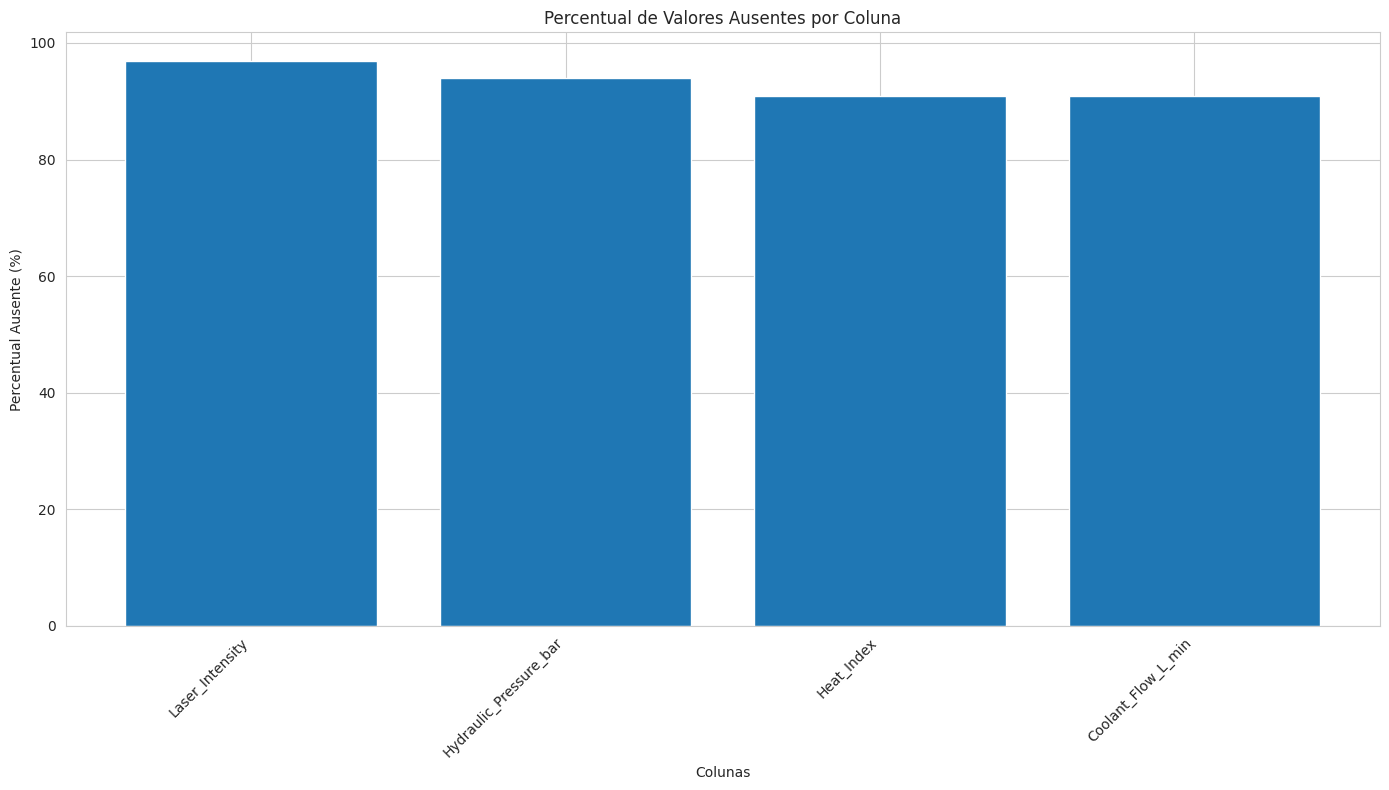

In [4]:
# Análise de valores ausentes
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(df) * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})

print("Análise de Valores Ausentes:")
print(missing_summary[missing_summary['Missing Count'] > 0])

# Visualização de valores ausentes
plt.figure(figsize=(14, 8))
missing_cols = missing_summary[missing_summary['Missing Count'] > 0].index
if len(missing_cols) > 0:
    plt.bar(range(len(missing_cols)), missing_summary.loc[missing_cols, 'Percentage'])
    plt.title('Percentual de Valores Ausentes por Coluna')
    plt.xlabel('Colunas')
    plt.ylabel('Percentual Ausente (%)')
    plt.xticks(range(len(missing_cols)), missing_cols, rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(REPORTS_PATH / '01_missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Não há valores ausentes no dataset!")

## 3. Análise da Variável Target: Failure_Within_7_Days

Distribuição de Falhas em 7 dias:
Sem falha (False): 469,968 (93.99%)
Com falha (True): 30,032 (6.01%)
Razão de desbalanceamento: 15.6:1


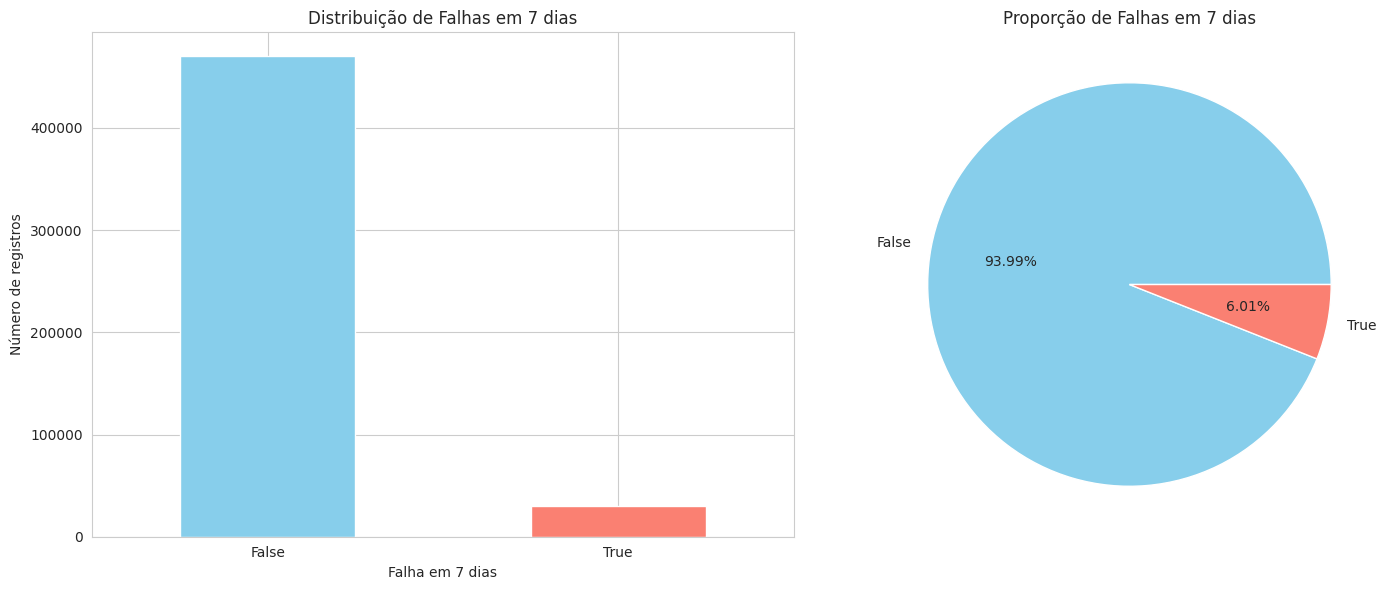

In [5]:
# Distribuição da variável target
target_dist = df['Failure_Within_7_Days'].value_counts()
target_percent = df['Failure_Within_7_Days'].value_counts(normalize=True) * 100

print("Distribuição de Falhas em 7 dias:")
print(f"Sem falha (False): {target_dist[False]:,} ({target_percent[False]:.2f}%)")
print(f"Com falha (True): {target_dist[True]:,} ({target_percent[True]:.2f}%)")
print(f"Razão de desbalanceamento: {target_dist[False] / target_dist[True]:.1f}:1")

# Visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
target_dist.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Distribuição de Falhas em 7 dias')
ax1.set_xlabel('Falha em 7 dias')
ax1.set_ylabel('Número de registros')
ax1.tick_params(axis='x', rotation=0)

# Gráfico de pizza
target_percent.plot(kind='pie', ax=ax2, autopct='%1.2f%%', colors=['skyblue', 'salmon'])
ax2.set_title('Proporção de Falhas em 7 dias')
ax2.set_ylabel('')

plt.tight_layout()
plt.savefig(REPORTS_PATH / '02_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Análise por Tipo de Máquina

Distribuição por Tipo de Máquina:
Machine_Type
AGV                      15409
Shuttle_System           15372
Crane                    15362
Labeler                  15347
CNC_Lathe                15290
Industrial_Chiller       15270
CMM                      15265
Pump                     15228
Vacuum_Packer            15219
Injection_Molder         15216
Automated_Screwdriver    15214
Mixer                    15208
Valve_Controller         15195
Vision_System            15188
Laser_Cutter             15156
Compressor               15153
Heat_Exchanger           15137
Palletizer               15131
Hydraulic_Press          15124
Dryer                    15120
Pick_and_Place           15117
Carton_Former            15112
Robot_Arm                15074
CNC_Mill                 15064
Boiler                   15050
Furnace                  15027
Forklift_Electric        15020
XRay_Inspector           15020
Grinder                  15011
Press_Brake              14991
Conveyor_Belt          

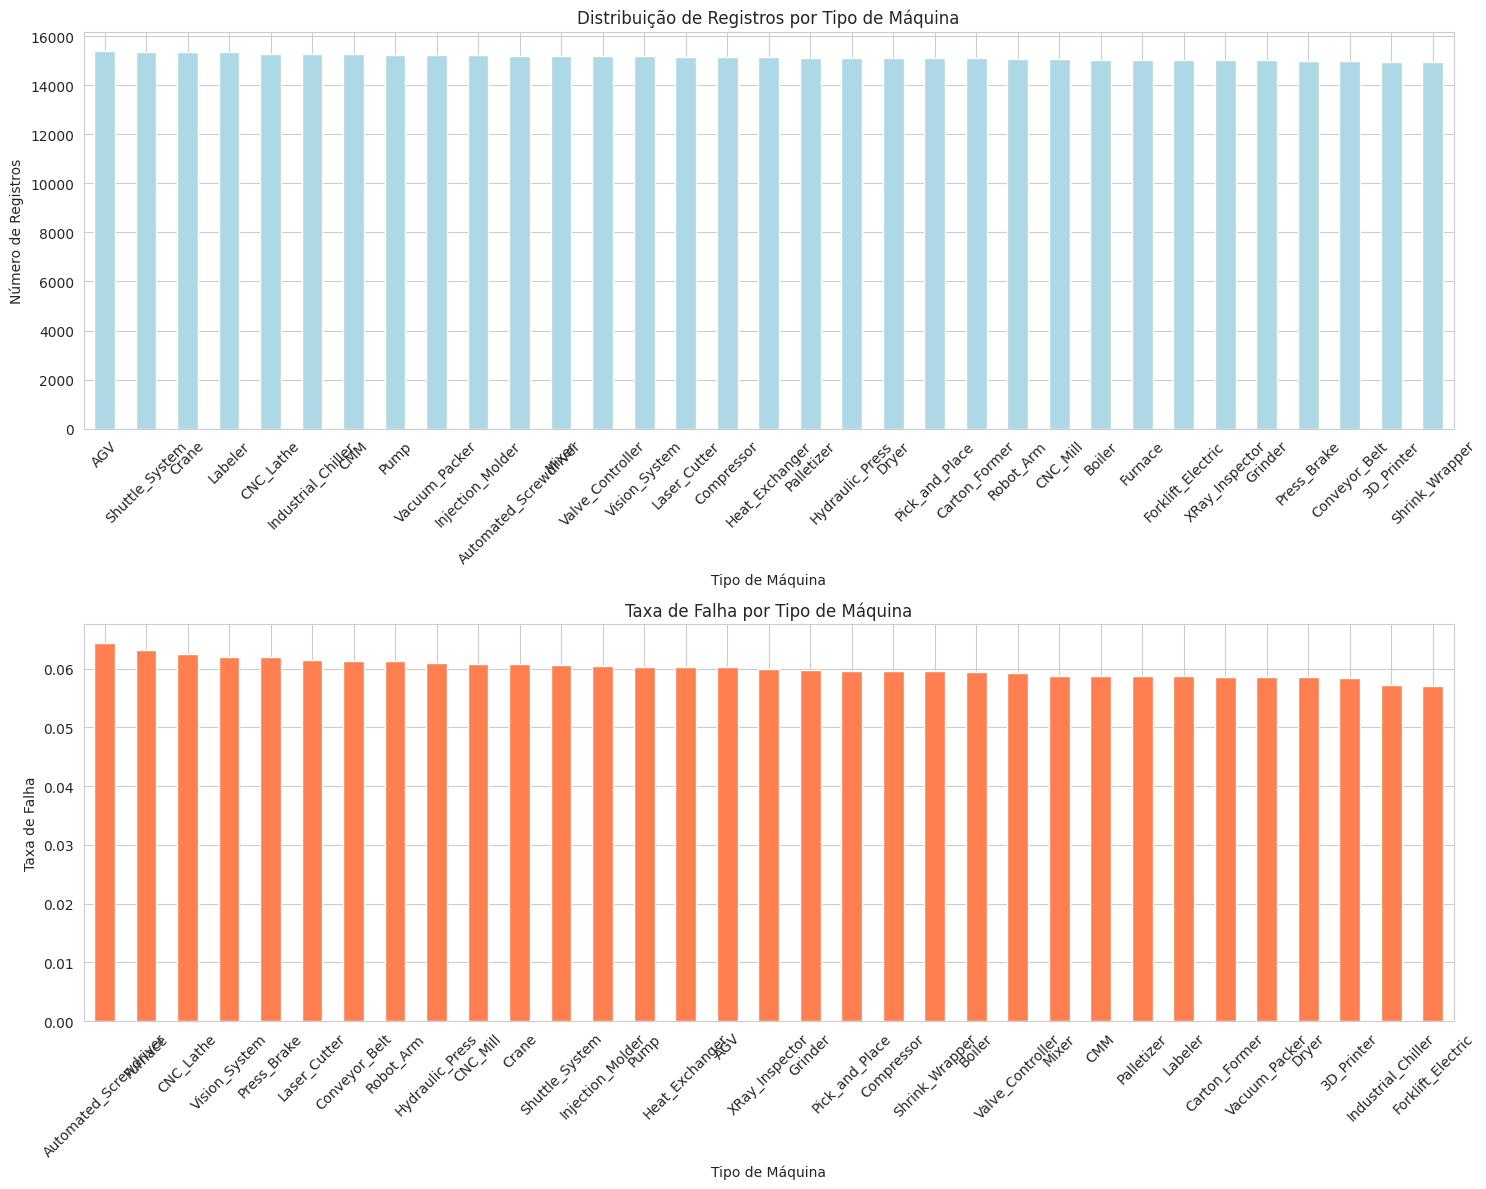

In [6]:
# Distribuição por tipo de máquina
machine_dist = df['Machine_Type'].value_counts()
print("Distribuição por Tipo de Máquina:")
print(machine_dist)

# Taxa de falha por tipo de máquina
failure_by_machine = df.groupby('Machine_Type')['Failure_Within_7_Days'].agg(['count', 'sum', 'mean']).round(4)
failure_by_machine.columns = ['Total_Records', 'Failures', 'Failure_Rate']
failure_by_machine = failure_by_machine.sort_values('Failure_Rate', ascending=False)

print("\nTaxa de Falha por Tipo de Máquina:")
print(failure_by_machine)

# Visualização
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Distribuição de máquinas
machine_dist.plot(kind='bar', ax=ax1, color='lightblue')
ax1.set_title('Distribuição de Registros por Tipo de Máquina')
ax1.set_xlabel('Tipo de Máquina')
ax1.set_ylabel('Número de Registros')
ax1.tick_params(axis='x', rotation=45)

# Taxa de falha por máquina
failure_by_machine['Failure_Rate'].plot(kind='bar', ax=ax2, color='coral')
ax2.set_title('Taxa de Falha por Tipo de Máquina')
ax2.set_xlabel('Tipo de Máquina')
ax2.set_ylabel('Taxa de Falha')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(REPORTS_PATH / '03_machine_type_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Análise de Sensores Principais

Estatísticas Descritivas dos Sensores Principais:
       Temperature_C  Vibration_mms   Sound_dB  Oil_Level_pct  \
count      500000.00      500000.00  500000.00      500000.00   
mean           60.00           9.99      75.00          69.46   
std            14.99           5.00       9.99          18.85   
min           -15.73         -17.82      23.65           0.00   
25%            49.89           6.62      68.27          56.54   
50%            60.00          10.00      75.00          70.03   
75%            70.05          13.36      81.73          83.54   
max           127.33          32.47     120.70         100.00   

       Coolant_Level_pct  Power_Consumption_kW  Operational_Hours  
count          500000.00             500000.00          500000.00  
mean               64.11                149.92           50012.42  
std                23.15                 79.96           28861.85  
min                 0.00               -222.74               0.00  
25%                48.13

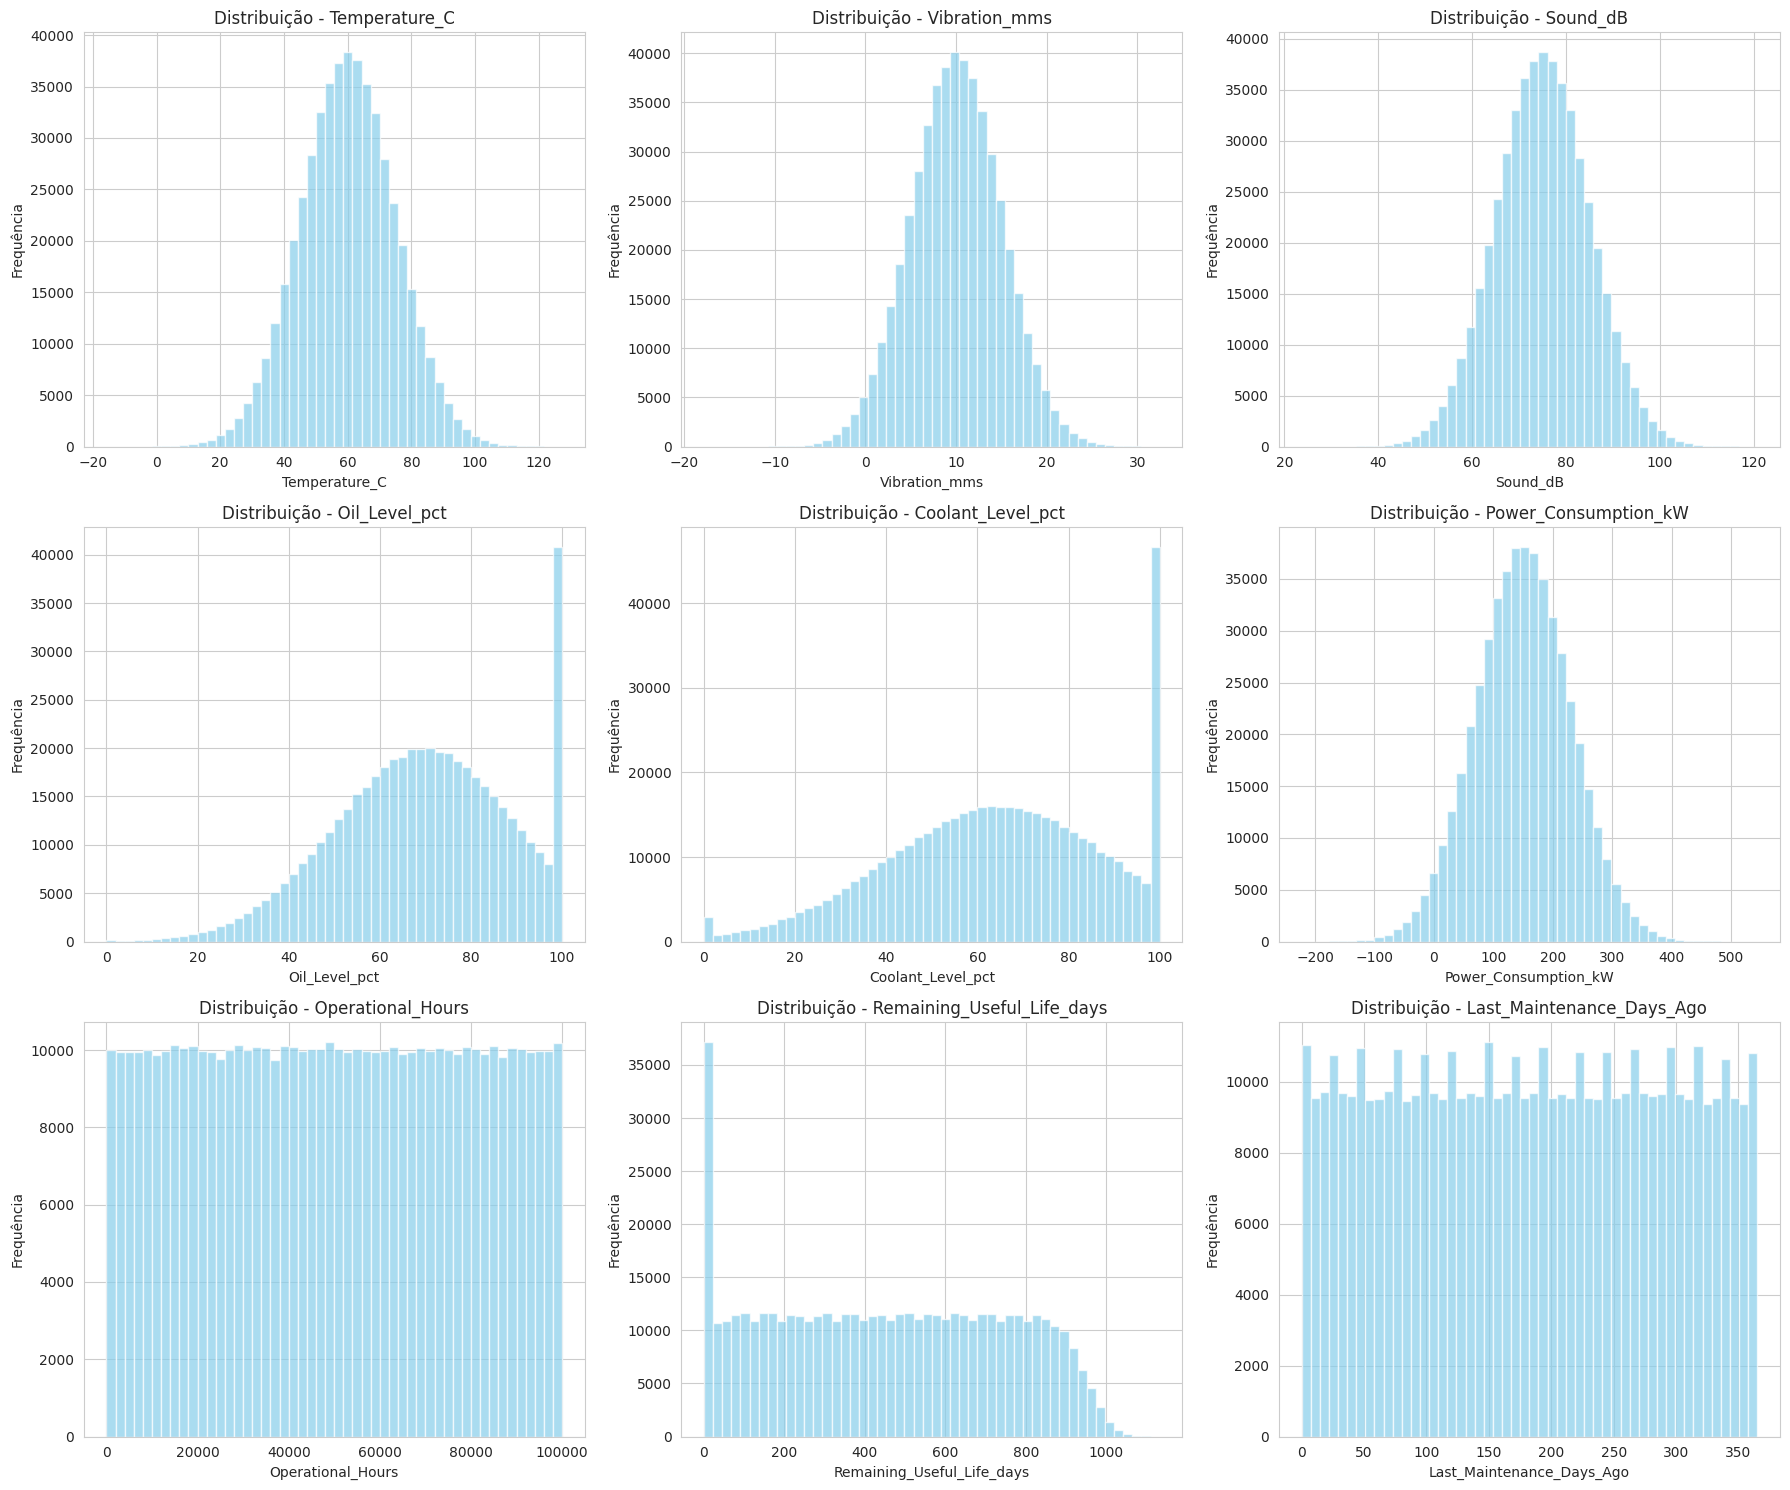

In [7]:
# Estatísticas descritivas dos sensores principais
sensor_cols = [
    'Temperature_C', 'Vibration_mms', 'Sound_dB', 'Oil_Level_pct', 
    'Coolant_Level_pct', 'Power_Consumption_kW', 'Operational_Hours'
]

sensor_stats = df[sensor_cols].describe()
print("Estatísticas Descritivas dos Sensores Principais:")
print(sensor_stats.round(2))

# Distribuições dos sensores
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(sensor_cols + ['Remaining_Useful_Life_days', 'Last_Maintenance_Days_Ago']):
    df[col].hist(bins=50, ax=axes[i], alpha=0.7, color='skyblue')
    axes[i].set_title(f'Distribuição - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Remove o subplot extra
if len(sensor_cols) + 2 < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig(REPORTS_PATH / '04_sensor_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Análise de Correlação

Correlações com Failure_Within_7_Days (em valor absoluto):
Operational_Hours             0.396812
Remaining_Useful_Life_days    0.395519
Vibration_mms                 0.037124
Temperature_C                 0.026189
Coolant_Flow_L_min            0.005955
Hydraulic_Pressure_bar        0.005669
Heat_Index                    0.004637
Laser_Intensity               0.002307
Coolant_Level_pct             0.002152
AI_Override_Events            0.002043
Name: Failure_Within_7_Days, dtype: float64


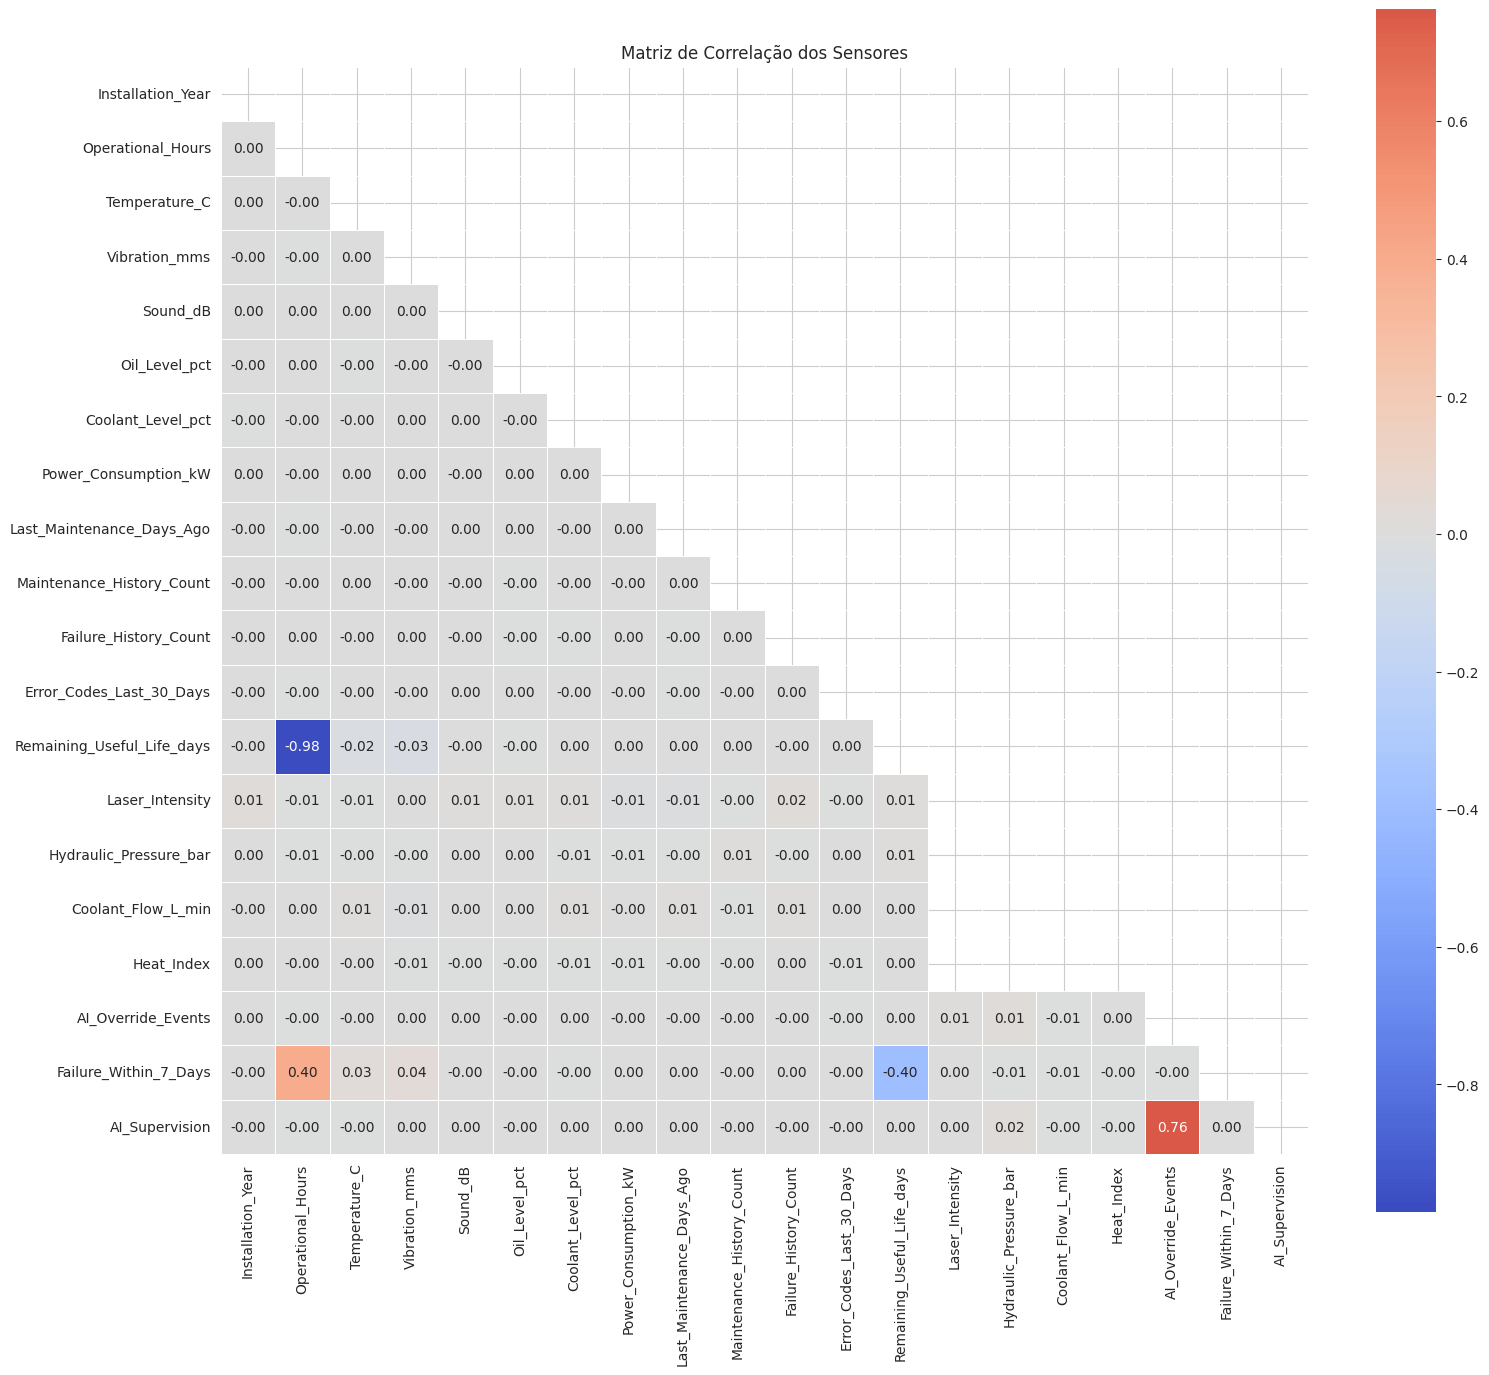

In [8]:
# Matriz de correlação
numeric_cols = df.select_dtypes(include=[np.number]).columns
# Converter boolean para numeric
df_numeric = df[numeric_cols].copy()
df_numeric['Failure_Within_7_Days'] = df['Failure_Within_7_Days'].astype(int)
df_numeric['AI_Supervision'] = df['AI_Supervision'].astype(int)

correlation_matrix = df_numeric.corr()

# Correlações com a variável target
target_corr = correlation_matrix['Failure_Within_7_Days'].drop('Failure_Within_7_Days').abs().sort_values(ascending=False)
print("Correlações com Failure_Within_7_Days (em valor absoluto):")
print(target_corr.head(10))

# Visualização da matriz de correlação
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Matriz de Correlação dos Sensores')
plt.tight_layout()
plt.savefig(REPORTS_PATH / '05_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Análise Temporal e de Manutenção

Estatísticas de Manutenção por Status de Falha:
                       Last_Maintenance_Days_Ago  Maintenance_History_Count  \
Failure_Within_7_Days                                                         
False                                     182.25                        5.0   
True                                      182.38                        5.0   

                       Failure_History_Count  Operational_Hours  
Failure_Within_7_Days                                            
False                                   2.00           47117.31  
True                                    2.01           95317.87  


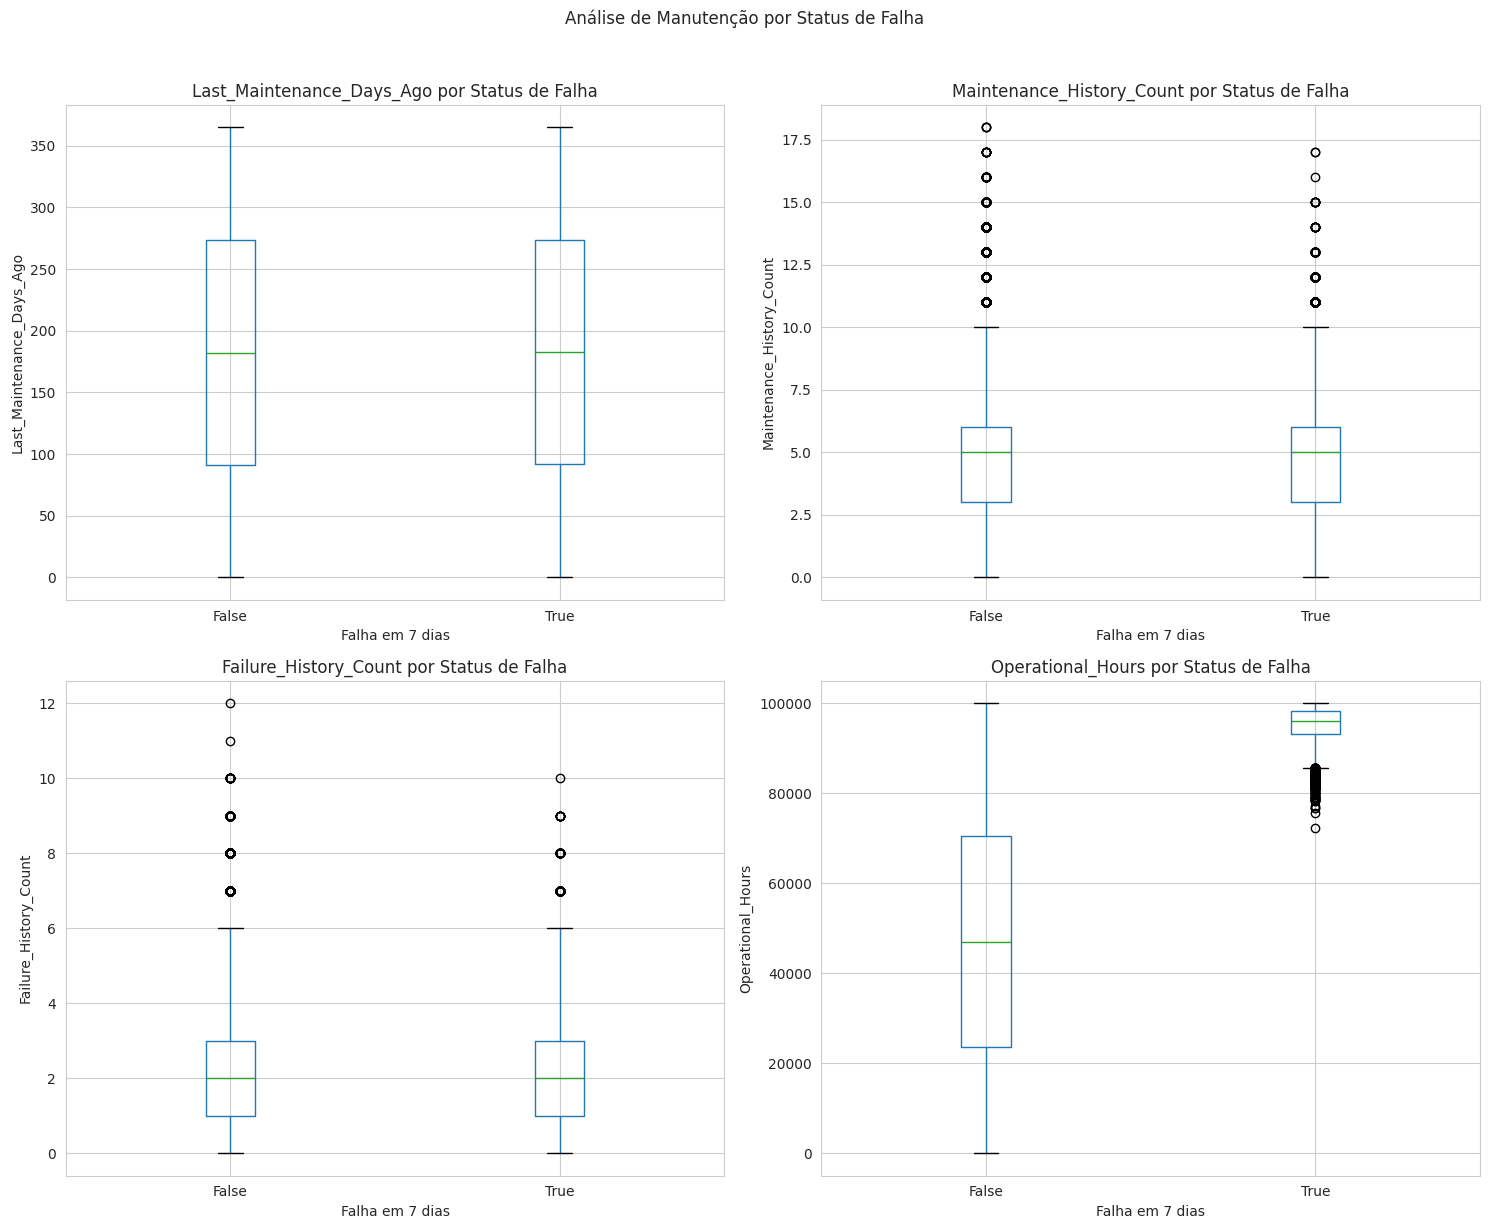

In [9]:
# Análise de manutenção
maintenance_stats = df.groupby('Failure_Within_7_Days')[[
    'Last_Maintenance_Days_Ago', 'Maintenance_History_Count', 
    'Failure_History_Count', 'Operational_Hours'
]].mean()

print("Estatísticas de Manutenção por Status de Falha:")
print(maintenance_stats.round(2))

# Visualização
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplots comparativos
variables = ['Last_Maintenance_Days_Ago', 'Maintenance_History_Count', 
            'Failure_History_Count', 'Operational_Hours']

for i, var in enumerate(variables):
    ax = axes[i//2, i%2]
    df.boxplot(column=var, by='Failure_Within_7_Days', ax=ax)
    ax.set_title(f'{var} por Status de Falha')
    ax.set_xlabel('Falha em 7 dias')
    ax.set_ylabel(var)

plt.suptitle('Análise de Manutenção por Status de Falha', y=1.02)
plt.tight_layout()
plt.savefig(REPORTS_PATH / '06_maintenance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 8. Preparação dos Dados para Modelagem

In [10]:
# Identificar features para modelagem
feature_cols = [
    'Temperature_C', 'Vibration_mms', 'Sound_dB', 'Oil_Level_pct',
    'Coolant_Level_pct', 'Power_Consumption_kW', 'Operational_Hours',
    'Last_Maintenance_Days_Ago', 'Maintenance_History_Count', 'Failure_History_Count',
    'Error_Codes_Last_30_Days', 'AI_Override_Events', 'Installation_Year'
]

# Verificar completude dos dados para ML
ml_data = df[feature_cols + ['Failure_Within_7_Days', 'Machine_Type']].copy()
print(f"Dados para ML: {ml_data.shape}")
print(f"Valores ausentes em features principais: {ml_data[feature_cols].isnull().sum().sum()}")

# Salvar dados limpos
processed_path = Path('../data/processed')
processed_path.mkdir(parents=True, exist_ok=True)

ml_data.to_csv(processed_path / 'ml_dataset.csv', index=False)
print(f"\nDados salvos em: {processed_path / 'ml_dataset.csv'}")

# Resumo final
print("\n" + "="*50)
print("RESUMO DA ANÁLISE EXPLORATÓRIA")
print("="*50)
print(f"• Dataset: {df.shape[0]:,} registros, {df.shape[1]} colunas")
print(f"• Target balanceamento: {target_percent[True]:.2f}% falhas, {target_percent[False]:.2f}% sem falha")
print(f"• Tipos de máquinas: {df['Machine_Type'].nunique()}")
print(f"• Features para ML: {len(feature_cols)}")
print(f"• Período operacional: {df['Operational_Hours'].min():.0f} - {df['Operational_Hours'].max():.0f} horas")
print(f"• Dados ausentes: {df.isnull().sum().sum()} valores")

Dados para ML: (500000, 15)
Valores ausentes em features principais: 0

Dados salvos em: ../data/processed/ml_dataset.csv

RESUMO DA ANÁLISE EXPLORATÓRIA
• Dataset: 500,000 registros, 22 colunas
• Target balanceamento: 6.01% falhas, 93.99% sem falha
• Tipos de máquinas: 33
• Features para ML: 13
• Período operacional: 0 - 100000 horas
• Dados ausentes: 1863666 valores
